# `classification.GLMNetCVClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [31]:
from slickml.classification import GLMNetCVClassifier

help(GLMNetCVClassifier)

Help on class GLMNetCVClassifier in module slickml.classification._glmnet:

class GLMNetCVClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
 |  GLMNetCVClassifier(alpha: Optional[float] = 0.5, n_lambda: Optional[int] = 100, n_splits: Optional[int] = 3, metric: Optional[str] = 'auc', scale: Optional[bool] = True, sparse_matrix: Optional[bool] = False, fit_intercept: Optional[bool] = True, cut_point: Optional[float] = 1.0, min_lambda_ratio: Optional[float] = 0.0001, tolerance: Optional[float] = 1e-07, max_iter: Optional[int] = 100000, random_state: Optional[int] = 1367, lambda_path: Union[List[float], numpy.ndarray, pandas.core.series.Series, NoneType] = None, max_features: Optional[int] = None) -> None
 |  
 |  GLMNet CV Classifier.
 |  
 |  This is wrapper using GLM-Net [1]_ to train a Regularized Linear Model via logitic regression and
 |  find the optimal penalty values through N-Folds cross validation. In principle, GLMNet (also known
 |  as ElasticNet) can also b

### Example 1: `GLMNetCVClassifer` mode for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
clf = GLMNetCVClassifier(
    alpha=0.9,
    n_splits=10,
    metric="auc",
)
clf.fit(X_train, y_train)

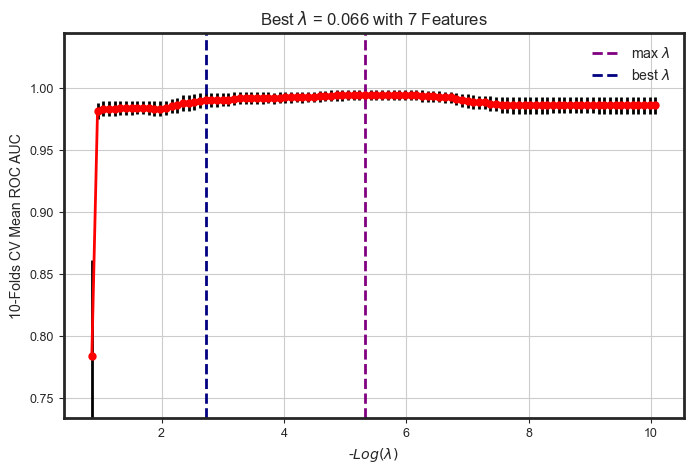

In [6]:
# plot cv_results
clf.plot_cv_results()

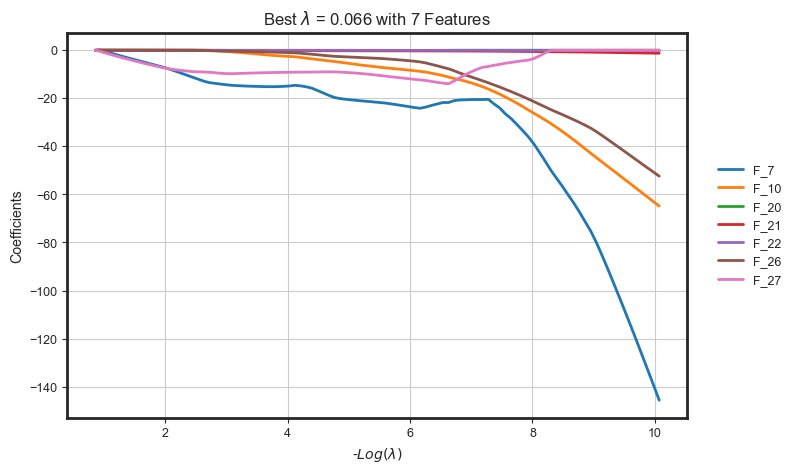

In [7]:
# plot coeff_paths
clf.plot_coeff_path()

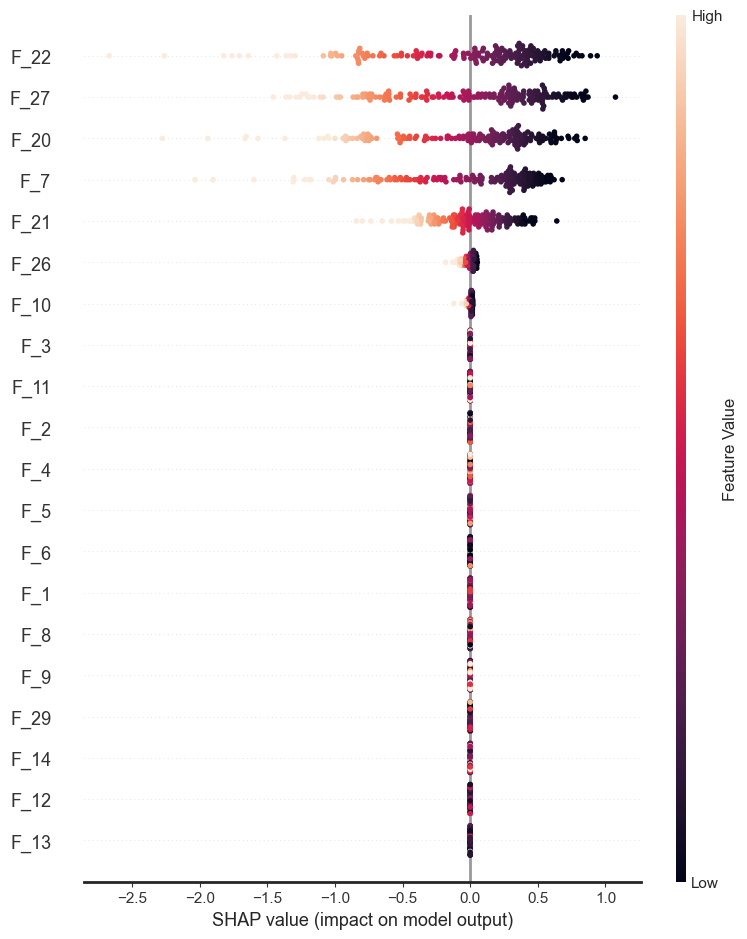

In [27]:
clf.plot_shap_summary()

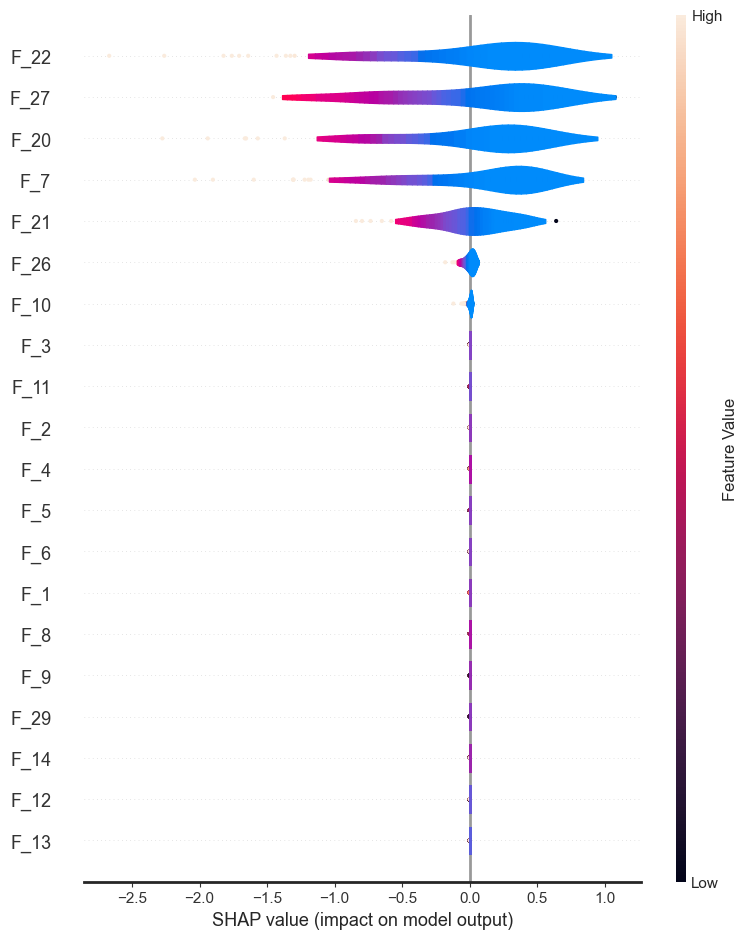

In [26]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

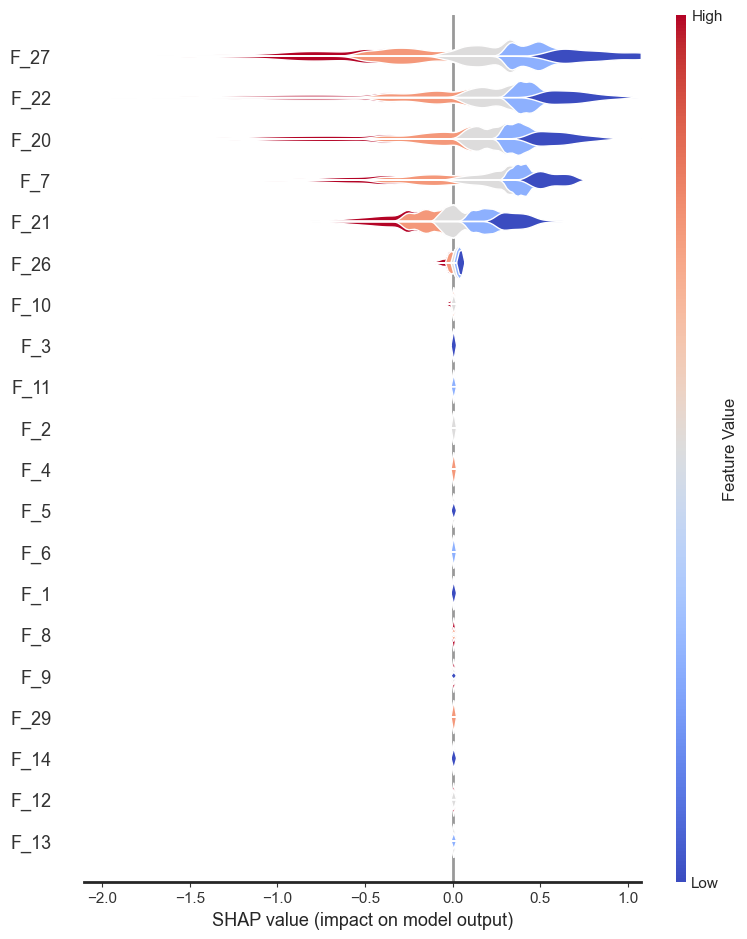

In [25]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

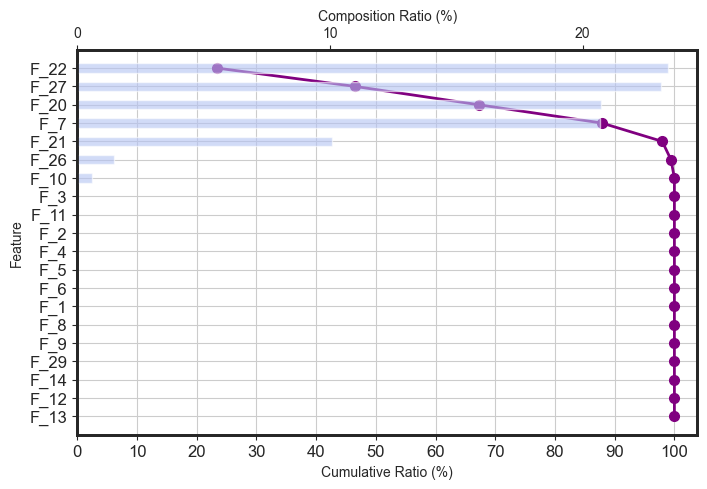

In [24]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [8]:
# pred proba (or clf.y_pred_proba_)
# y_test in optional
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba[:10]

array([0.83392861, 0.95880756, 0.33352435, 0.94311025, 0.92206599,
       0.19186543, 0.91148388, 0.91047641, 0.86218897, 0.83948625])

In [9]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [10]:
# non-zero coeffs (or clf.get_coeffs())
clf.coeff_

,feature,coeff
0,F_22,-0.018605
1,F_21,-0.048187
2,F_10,-0.057320
3,F_20,-0.115437
4,F_26,-0.199538
5,F_27,-9.179469
6,F_7,-13.493987


In [11]:
# intercept (or clf.get_intercept())
clf.intercept_

7.5647700437222145

In [12]:
# model cv_results_ (or clf.get_cv_results())
clf.cv_results_

,F_0_coeff_path,F_1_coeff_path,F_2_coeff_path,F_3_coeff_path,F_4_coeff_path,F_5_coeff_path,F_6_coeff_path,F_7_coeff_path,F_8_coeff_path,F_9_coeff_path,...,F_24_coeff_path,F_25_coeff_path,F_26_coeff_path,F_27_coeff_path,F_28_coeff_path,F_29_coeff_path,intercept_path,lambda_path,cv_standard_error,cv_mean_score
0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.524249,0.422664,0.077429,0.077429
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,-0.606122,0.000000,0.000000,0.902851,0.385115,0.006343,0.006343
2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.686835,0.000000,0.000000,...,0.000000,0.0,0.000000,-1.364099,0.000000,0.000000,1.232692,0.350903,0.005915,0.005915
3,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-1.413489,0.000000,0.000000,...,0.000000,0.0,0.000000,-2.036297,0.000000,0.000000,1.549696,0.319729,0.005859,0.005859
4,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-2.091275,0.000000,0.000000,...,0.000000,0.0,0.000000,-2.690301,0.000000,0.000000,1.854064,0.291326,0.005722,0.005722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.026270,0.0,0.0,202.820453,134.406909,-88.575287,-120.787204,42.498289,91.316567,...,-166.036704,0.0,-45.656372,0.000000,-110.141875,66.786452,95.576998,0.000061,0.006614,0.006614
96,0.0,0.029766,0.0,0.0,214.062158,139.931500,-90.878562,-126.933859,42.956922,84.485894,...,-174.672059,0.0,-47.359054,0.000000,-113.895485,74.837457,98.966987,0.000056,0.006614,0.006614
97,0.0,0.033156,0.0,0.0,225.382572,145.463040,-93.204677,-133.128450,43.355926,77.519710,...,-183.397036,0.0,-49.050861,0.000000,-117.625887,82.877965,102.374178,0.000051,0.006614,0.006614
98,0.0,0.036697,0.0,0.0,236.704455,150.980897,-95.573005,-139.347194,43.690201,70.853233,...,-192.118871,0.0,-50.730924,0.000000,-121.343860,90.681471,105.800625,0.000046,0.006614,0.006614


In [13]:
# total model results json (or clf.get_results())
clf.results_.keys()

dict_keys(['coeff', 'coeff_path', 'cv_standard_error', 'cv_mean_score', 'lambda_path', 'lambda_best', 'lambda_max', 'n_lambda', 'intercept', 'intercept_path', 'params', 'module'])

In [14]:
# model's fitting params (or clf.get_params())
clf.params_

{'alpha': 0.9,
 'cut_point': 1.0,
 'fit_intercept': True,
 'lambda_path': None,
 'lower_limits': -inf,
 'max_features': None,
 'max_iter': 100000,
 'min_lambda_ratio': 0.0001,
 'n_jobs': -1,
 'n_lambda': 100,
 'n_splits': 10,
 'random_state': 1367,
 'scoring': 'roc_auc',
 'standardize': True,
 'tol': 1e-07,
 'upper_limits': inf,
 'verbose': False}

In [28]:
clf.model_

LogitNet(alpha=0.9, n_jobs=-1, n_splits=10, random_state=1367,
         scoring='roc_auc')

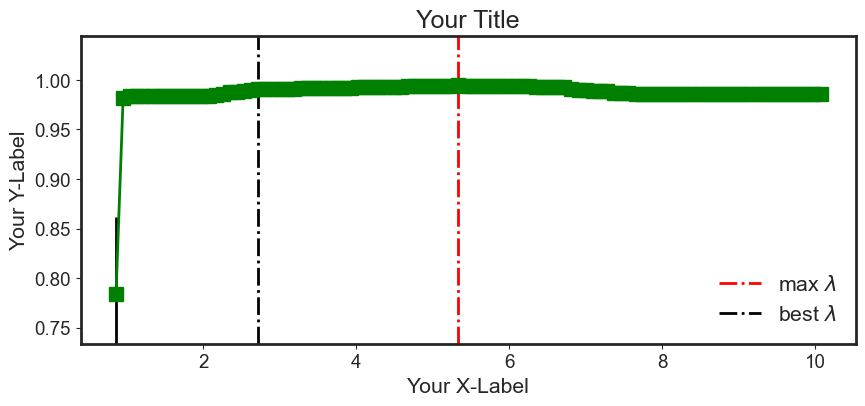

In [15]:
# plot cv_results -> try customizing it with your favorite style
clf.plot_cv_results(
    figsize=(10, 4),
    marker="s",
    markersize=10,
    color="green",
    maxlambdacolor="red",
    bestlambdacolor="black",
    linestyle="-.",
    fontsize=18,
    grid=False,
    legend=True,
    legendloc=4,
    xlabel="Your X-Label",
    ylabel="Your Y-Label",
    title="Your Title",
    save_path=None,
)

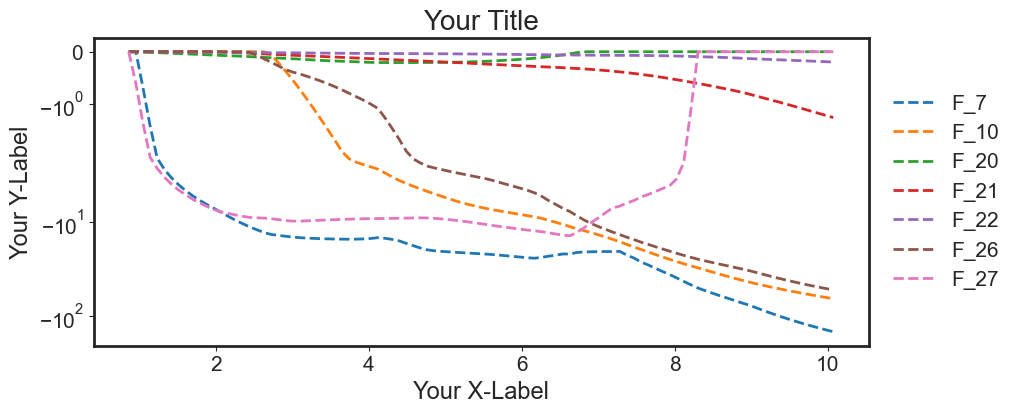

In [16]:
# plot coeff_paths --> try customizing it with your favorite style
clf.plot_coeff_path(
    figsize=(10, 4),
    linestyle="--",
    fontsize=20,
    grid=False,
    legend=True,
    legendloc="center",
    xlabel="Your X-Label",
    ylabel="Your Y-Label",
    title="Your Title",
    bbox_to_anchor=(1.1, 0.5),
    yscale="symlog",
    save_path=None,
)

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [29]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.953000,0.938000,0.995000,0.997000,0.930000,1.000000,0.997000,0.964000,0.985000,0.944000,0.930000,107,56,8,0


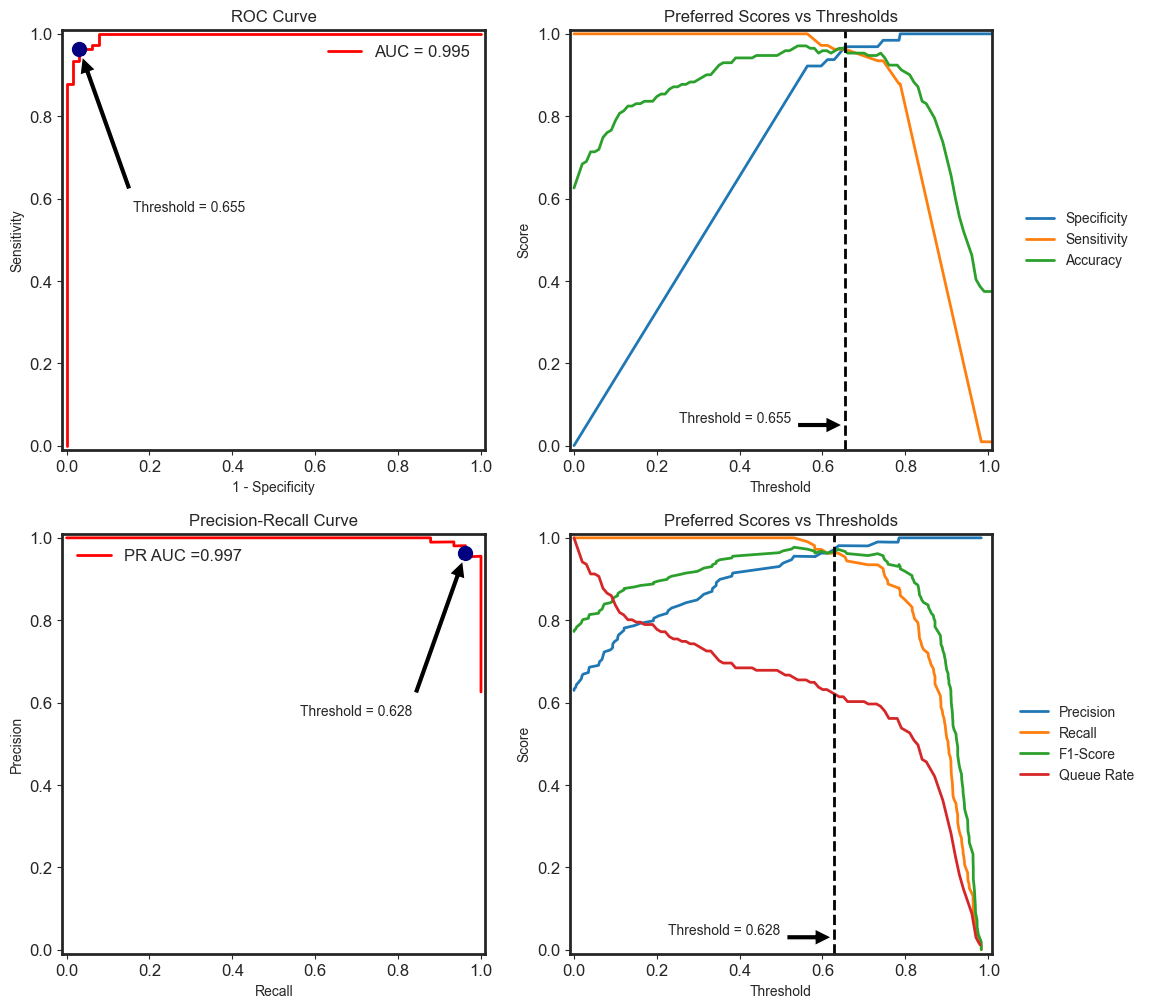

In [30]:
metrics.plot()